In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Import the data

df = pd.read_csv("Resources/lending_data.csv", encoding="utf-8", low_memory=False)

In [ ]:
df.info()

In [ ]:
df["loan_status"].value_counts()

In [3]:
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

target_names=["bad risk", "good risk"]

In [4]:
print(f"Shape: {X.shape} {y.shape}")

Shape: (77536, 7) (77536,)


In [5]:
# Split the data into X_train, X_test, y_train, y_test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [6]:
# Train a Logistic Regression model print the model score

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier

LogisticRegression()

In [7]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [8]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9921240885954051
Testing Data Score: 0.9918489475856377


In [9]:
from sklearn.metrics import confusion_matrix, classification_report

y_true = y_test
y_pred = classifier.predict(X_test)

# print(confusion_matrix(y_true, y_pred))

print(classification_report(y_true, y_pred, target_names=target_names)) 

              precision    recall  f1-score   support

    bad risk       1.00      0.99      1.00     18765
   good risk       0.85      0.91      0.88       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



In [10]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

accuracy = (tp + tn) / (tp + fp + tn + fn) 
print(f"Accuracy: {accuracy}")

Accuracy: 0.9918489475856377


# Let's Try Random Forest Classifier

In [11]:
# Train a Random Forest Classifier model and print the model score

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)

print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')
print(classification_report(y_test, y_pred, target_names=target_names))

Training Score: 0.9975409272252029
Testing Score: 0.9917457697069748
              precision    recall  f1-score   support

    bad risk       1.00      0.99      1.00     18765
   good risk       0.85      0.91      0.88       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



[1.29066792e-01 2.74137485e-01 1.74521675e-01 1.58682971e-01
 1.18902531e-01 8.06639163e-05 1.44607881e-01]


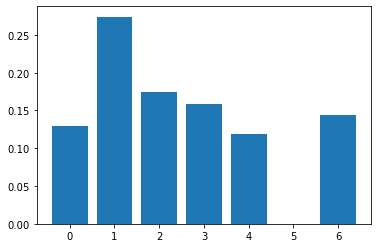

In [13]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [14]:
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([False,  True,  True,  True, False, False,  True])

In [15]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)

scaler = StandardScaler().fit(X_selected_train)

X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

C:\Users\vannx\anaconda3\envs\PythonData38\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [16]:
clf = LogisticRegression().fit(X_train_scaled, y_train)

print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9942908240473243
Testing Score: 0.9936545604622369


In [17]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9942908240473243
Testing Score: 0.9936545604622369
